# Simple Linear Regression

Importing Data set

In [184]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import sklearn.metrics as sm
from sklearn import metrics
import math
from sklearn.metrics import accuracy_score
try:
    df = pd.read_csv('weatherHistory.csv')
except FileNotFoundError:
    print("File not found")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB
None


# Data Preprocessing

Handling Missing Data

In [185]:
# Checking for null values in dataset
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [186]:
df.rename(columns = {'Apparent Temperature (C)':'Temperature'}, inplace = True)

Feature Scaling

In [187]:
# Feature scaling using Standardization
list = ['Humidity','Temperature']
for col in list:
   df[col] = (df[col] - df[col].mean())/df[col].std()


Separating independent and dependent variables

In [188]:
x = df['Humidity']
y = df['Temperature']

Splitting Dataset for train and test

In [189]:
s_f = 0.8
n = math.floor(s_f * df.shape[0])
l = len(x)
x_train = x.head(n)
y_train = y.head(n)
x_test = x.head(l-n)
y_test = y.head(l-n)

print("x_train")
print(x_train)
print("\ny_train")
print(y_train)
print("\nx_test")
print(x_test)
print("\ny_test")
print(y_test)
x_train.shape

x_train
0        0.793466
1        0.639992
2        0.793466
3        0.486518
4        0.486518
           ...   
77157    0.998098
77158    0.998098
77159    0.946940
77160    0.998098
77161    0.998098
Name: Humidity, Length: 77162, dtype: float64

y_train
0       -0.324034
1       -0.339095
2       -0.138102
3       -0.459068
4       -0.362467
           ...   
77157   -1.009075
77158   -1.043353
77159   -0.906241
77160   -1.025175
77161   -1.103080
Name: Temperature, Length: 77162, dtype: float64

x_test
0        0.793466
1        0.639992
2        0.793466
3        0.486518
4        0.486518
           ...   
19286   -0.076220
19287    0.179570
19288    0.230728
19289    0.946940
19290    0.793466
Name: Humidity, Length: 19291, dtype: float64

y_test
0       -0.324034
1       -0.339095
2       -0.138102
3       -0.459068
4       -0.362467
           ...   
19286    0.131968
19287    0.025498
19288   -0.162512
19289   -0.581119
19290   -0.499579
Name: Temperature, Length: 19291, 

(77162,)

# Building model using train data

Converting dataset into numpy array

In [190]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)


y_test = np.array(y_test).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)


Add one column in x train and x test array for x0 which is equal to one

In [191]:
x0_train = np.ones((len(x_train),1))
X0_test = np.ones((len(x_test),1))
#print(x0_train.shape)

new_x_train = np.c_[x0_train,x_train]
new_x_test = np.c_[X0_test,x_test]
new_x_train.shape


(77162, 2)

Function for Calculating Hypothesis value of x train data 

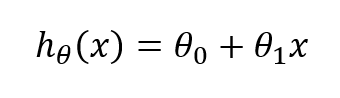

In [192]:
Image("Univariate linear equation.PNG", width = 200, height = 50)

In [193]:
def hypothesis(x,theta):
    hypothesis_of_theta = np.dot(x,theta)
    return hypothesis_of_theta

Function for Calculating cost function of linear regression with one variable

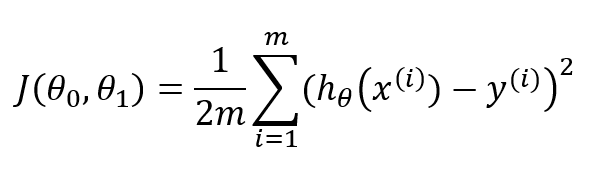

In [194]:
Image("CostFunction.PNG", width = 350, height = 100)

In [195]:
def cost_function(x,y,theta):
    m = len(x)
    hypothesis_of_theta = hypothesis(x,theta)
    temp = (hypothesis_of_theta - y) ** 2
    j_of_theta = temp.sum()/(2*m)
    return j_of_theta

Function for Minimizing cost function using Gradient Decent

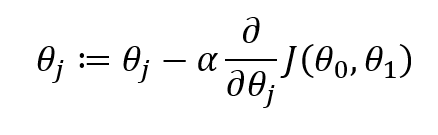

In [196]:
Image("Gradient Decent.PNG", width = 350, height = 100)

In [197]:
def gradient_descent(x,y,theta,alpha,steps):
    m = len(x)
    cost_function_values = []
    theta0 =[]
    theta1 = []
    theta_values = []
    for i in range(steps):
        hypothesis_of_theta = hypothesis(x,theta)
        #print(hypothesis_of_theta)
        temp = np.dot(x.T,(hypothesis_of_theta - y))
        #print(temp)
        derivatives = temp*(alpha/m)
        theta = theta - derivatives
        #print(f"Step {i+1} : theta 0 : {theta[0]} theta 1 : {theta[1]}")
        theta0.append(theta[0].tolist())
        theta1.append(theta[1].tolist())
        theta_values.append(theta)
        cost_function_values.append(cost_function(x,y,theta).tolist())
    return theta,cost_function_values ,theta0,theta1,theta_values



In [198]:
theta = np.zeros((2,1))
print(theta.shape)

(2, 1)


Training data by calling function

In [199]:
steps = 300
alpha = 0.01
print(f"Initial : theta 0 : {theta[0]} theta 1 : {theta[1]}")

#calling gradient decent function for minimizing theta 0 and theta 1 by passing x train data, y train data , 
#theta array which contains theta 0 and theta 1 as 0 , alpha and steps for gradient decent 
minimize_j_of_theta,cost_function_values,theta0,theta1 ,theta_values= gradient_descent(new_x_train,y_train,theta,alpha,steps)
print(f"Final Theta 0 : {minimize_j_of_theta[0]} Theta 1 : {minimize_j_of_theta[1]}")
#print(f"\n\nCost function after every iteration : {cost_function_values}")
theta0 = np.array(theta0).flatten()
theta1 = np.array(theta1).flatten()
cost_function_values = np.array(cost_function_values).flatten()

Initial : theta 0 : [0.] theta 1 : [0.]
Final Theta 0 : [-0.02108531] Theta 1 : [-0.58141534]


# Testing

Calling function of hypothesis for x test data to find y predicted value

In [200]:
y_predicted = hypothesis(new_x_test,minimize_j_of_theta)
#print(y_predicted)

Finding the accuracy of our model by comparing real y test with y value predicted by model

In [201]:

print(f"Accuracy of model : {metrics.r2_score(y_test,y_predicted)}")          

Accuracy of model : 0.4074460411489699


# Graph Representation

Text(0.5, 1.0, 'X train  Vs  Y train')

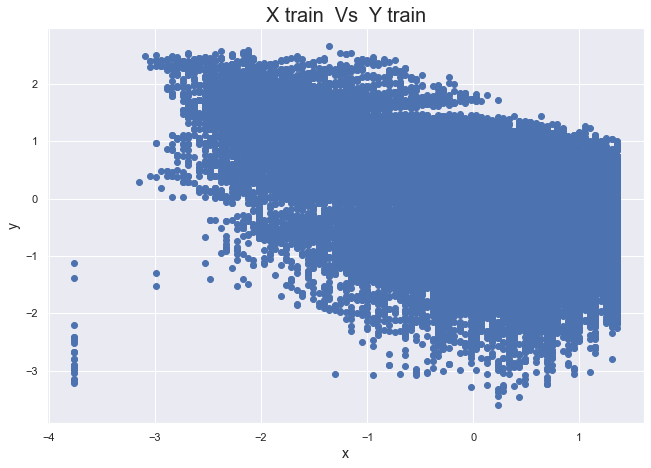

In [202]:
sns.set(rc={'figure.figsize':(10.7,7.27)})
plt.scatter(df["Humidity"],df["Temperature"])
plt.xlabel("x",fontsize = 14)
plt.ylabel("y",fontsize = 14)
plt.title("X train  Vs  Y train" ,fontsize = 20)

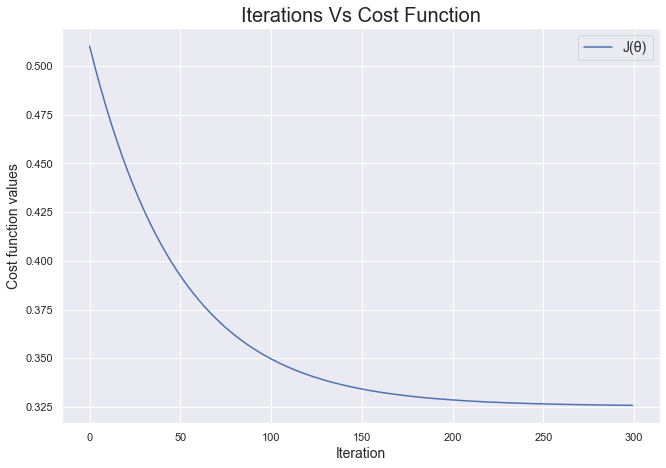

In [203]:
plt.plot(cost_function_values,label = "J(θ)")
plt.title("Iterations Vs Cost Function" ,fontsize = 20)
plt.xlabel("Iteration",fontsize = 14)
plt.ylabel("Cost function values",fontsize = 14)
plt.legend(fontsize = 14)

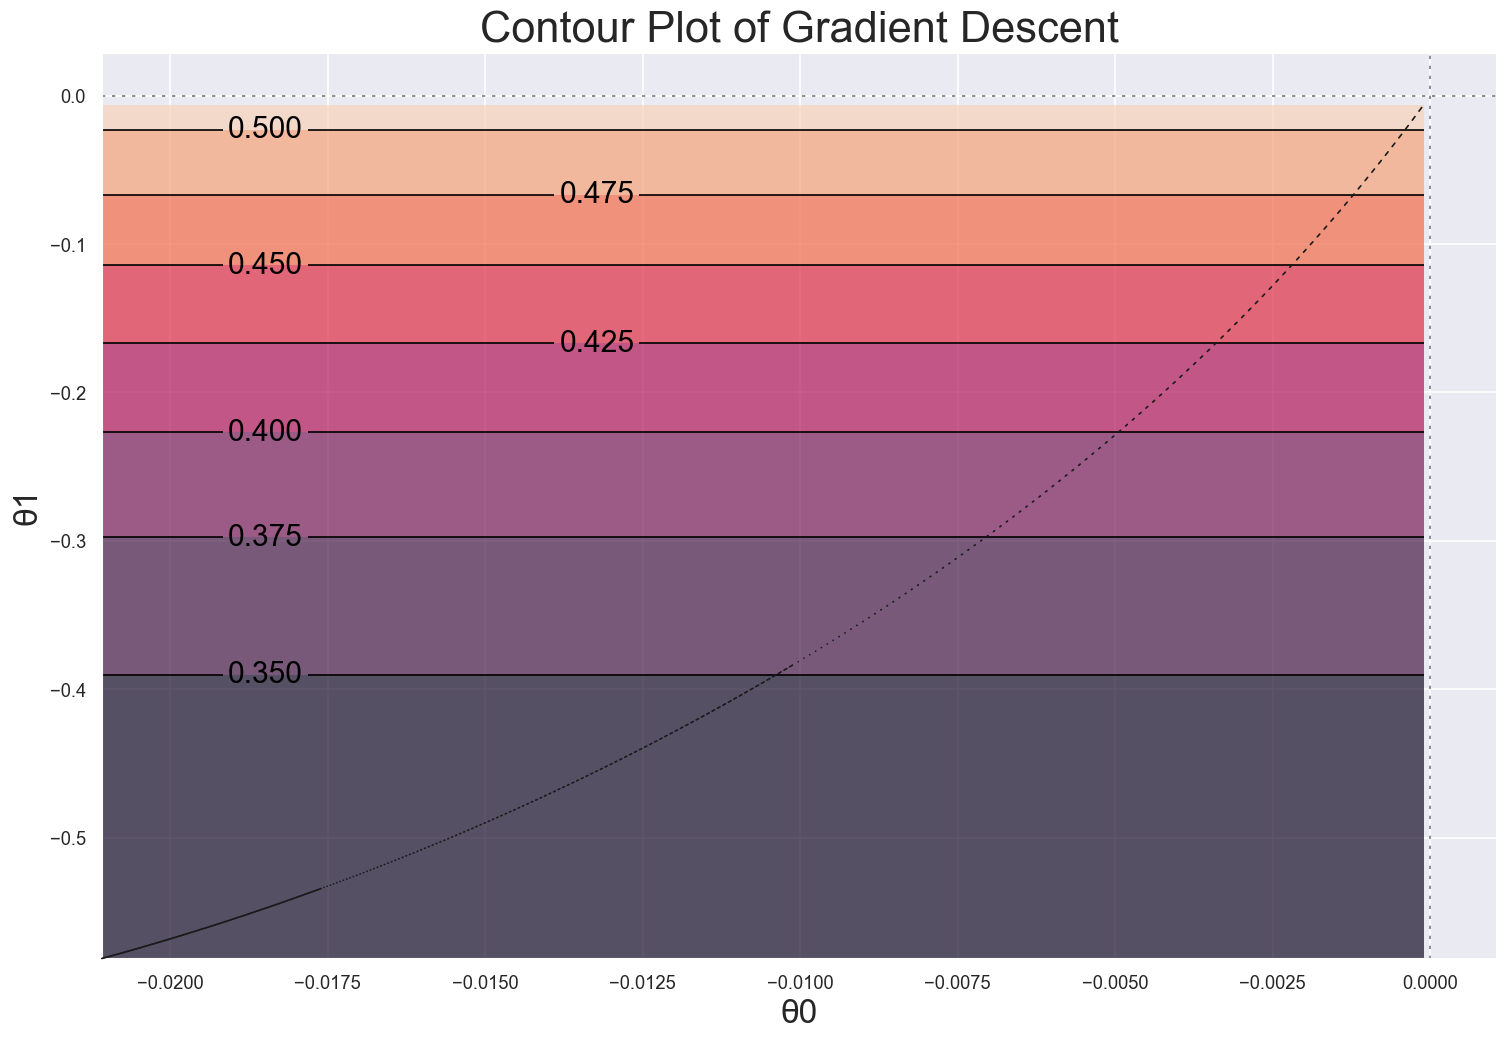

In [204]:

x = np.linspace(np.min(theta0),np.max(theta0),steps)
y = np.linspace(np.min(theta1),np.max(theta1),steps)
z = np.zeros([steps,steps])
#print(z)

for i in range(steps):
    for j in range(steps):
        t = np.array([x[i],y[i]])
        t = t.reshape(-1,1)
        z[i,j] = cost_function(new_x_train,y_train,t)

all_ws = np.array(theta_values)
fig, ax = plt.subplots(figsize=(15, 10), dpi=120)
plt.contourf(x, y, z,alpha=.7)
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)
for i in range(len(theta0) - 1):
    plt.annotate('', xy=all_ws[i + 1, :], xytext=all_ws[i, :],
                 arrowprops={'arrowstyle': '-', 'color': 'k', 'lw': 1},
                 va='center', ha='center')
 
CS = ax.contour(x, y, z, linewidths=1,colors='black')
ax.clabel(CS, inline = True ,fontsize=18)
plt.title("Contour Plot of Gradient Descent",fontsize = 26)
plt.xlabel("θ0",fontsize = 20)
plt.ylabel("θ1",fontsize = 20)
plt.show()

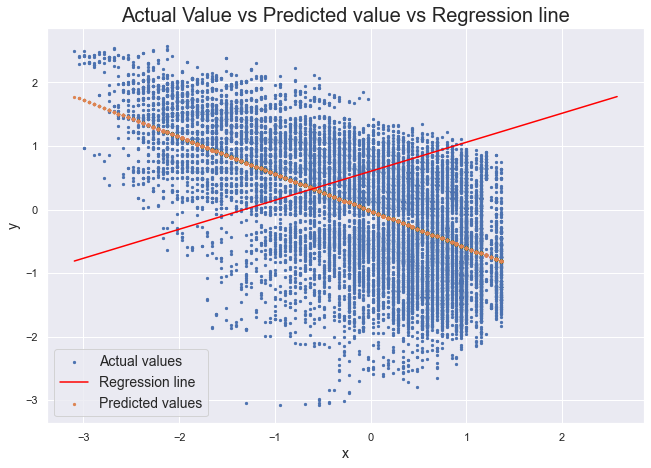

In [205]:
plt.scatter(x_test, y_test,s = 5,label="Actual values") 
plt.plot([min(x_test), max(y_test)], [min(y_predicted), max(y_predicted)], color='red',label = "Regression line")  # regression line
plt.xlabel("x" ,fontsize = 14)
plt.scatter(x_test, y_predicted,s = 5,label = "Predicted values") 
plt.ylabel("y",fontsize = 14)
plt.legend(fontsize = 14)
plt.title("Actual Value vs Predicted value vs Regression line",fontsize = 20)
plt.show()

# Building model using Sci-kit Learn 

In [206]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
reg.score(x_train,y_train)
print(f"Accuracy of model : {round(metrics.r2_score(y_test,y_pred),2)}") 
print(f"Coefficient (theta 1) : {reg.coef_}")
print(f"Intercept (theta 0) : {reg.intercept_}")

Accuracy of model : 0.41
Coefficient (theta 1) : [[-0.61043634]]
Intercept (theta 0) : [-0.02428375]
